In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import seaborn as sns

In [5]:
sns.set_context('poster', font_scale=1.25)

In [6]:
import findspark as fs

In [7]:
fs.init()

In [8]:
import pyspark as ps

In [9]:
sc = ps.SparkContext(appName='ipython_testing')

In [14]:
import P2

In [15]:
num_pixels = 2000

In [28]:
num_pixels = 2000
rows = sc.range(num_pixels)
cols = sc.range(num_pixels)

In [29]:
indices = rows.cartesian(cols)

In [43]:
def mandelbrot_wrapper(row, col):
    x = col/(num_pixels/4.) - 2.
    y = row/(num_pixels/4.) - 2.
    
    return ((row, col), P2.mandelbrot(x, y))


In [44]:
mandelbrot_rdd = indices.map(lambda a: mandelbrot_wrapper(*a))

We now need to turn this into a key-value pair...

In [47]:
mandelbrot_result = mandelbrot_rdd.collect()

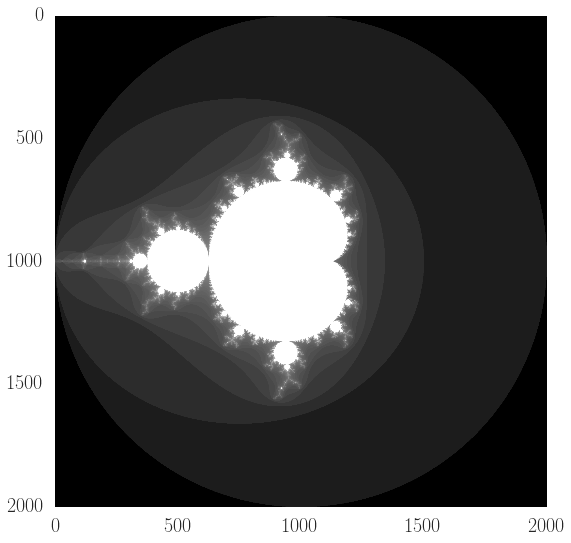

In [51]:
plt.grid(False)
P2.draw_image(data=mandelbrot_result)

Beautiful. We have liftoff!